Models : VGG, MobileNet, and ResNet

Stable diffusion: https://www.zdnet.com/article/how-to-use-stable-doodle-ai-to-transform-your-doodles-into-artwork/

model name:  pix2pix model

Useful github links: https://github.com/ssusnic/Machine-Learning-Doodle-Recognition



#Data Visualization

In [ ]:
path = 'drive/My\ Drive/Final\ Data'
!ls $path | wc -l

948


In [ ]:
!ls $path

0.jpeg	  207.jpeg  314.jpeg  421.jpeg	52.jpeg   637.jpeg  744.jpeg  851.jpeg
100.jpeg  208.jpeg  315.jpeg  423.jpeg	530.jpeg  638.jpeg  745.jpeg  852.jpeg
101.jpeg  209.jpeg  316.jpeg  424.jpeg	531.jpeg  639.jpeg  746.jpeg  853.jpeg
102.jpeg  20.jpeg   317.jpeg  425.jpeg	532.jpeg  63.jpeg   747.jpeg  854.jpeg
103.jpeg  210.jpeg  318.jpeg  426.jpeg	533.jpeg  640.jpeg  748.jpeg  855.jpeg
104.jpeg  211.jpeg  319.jpeg  427.jpeg	534.jpeg  641.jpeg  749.jpeg  856.jpeg
105.jpeg  212.jpeg  31.jpeg   428.jpeg	535.jpeg  642.jpeg  74.jpeg   857.jpeg
106.jpeg  213.jpeg  320.jpeg  429.jpeg	536.jpeg  643.jpeg  750.jpeg  858.jpeg
107.jpeg  214.jpeg  321.jpeg  42.jpeg	537.jpeg  644.jpeg  751.jpeg  859.jpeg
108.jpeg  215.jpeg  322.jpeg  430.jpeg	538.jpeg  645.jpeg  752.jpeg  85.jpeg
109.jpeg  216.jpeg  323.jpeg  431.jpeg	539.jpeg  646.jpeg  753.jpeg  860.jpeg
10.jpeg   217.jpeg  324.jpeg  432.jpeg	53.jpeg   647.jpeg  754.jpeg  861.jpeg
110.jpeg  218.jpeg  325.jpeg  433.jpeg	540.jpeg  648.jpeg  755.jpeg

In [ ]:
import numpy as np
import PIL
import matplotlib.pyplot as plt

In [5]:
!pip install imutils

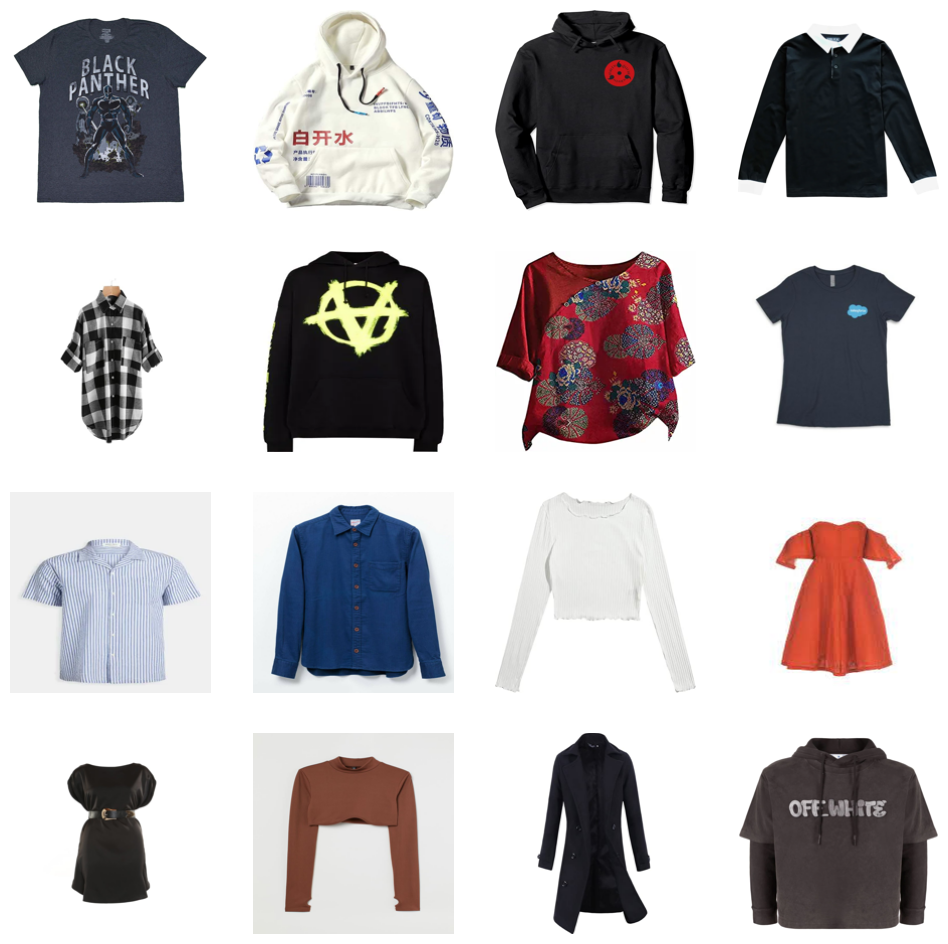

In [ ]:
w = 6
h = 6

load_img = lambda filename: np.array(PIL.Image.open(f"drive/My Drive/Final Data/{filename}.jpeg").resize((200, 200)))

_, axes_list = plt.subplots(4, 4, figsize=(2*w, 2*h)) # define a grid of (w, h)

for axes in axes_list:
    for ax in axes:
        ax.axis('off')
        randomimg = "{}.jpeg".format(np.random.randint(1,949))
        img = np.random.choice(950) # take a random train filename (like 000c34352.jpg)
        ax.imshow(load_img(img)) # load and show
        # ax.set_title(img)

#Model for Dress Classification

https://github.com/AarohiSingla/Image-Classification-Using-Vision-transformer

https://github.com/praveen1664/CNN_Dataset_for_Image_Classification

https://github.com/clarkjanndy/plant-image-classification/blob/master/Medicinal%20Plant%20Classification.ipynb


In [4]:
!pip install tensorflow
!pip install opencv-python-headless

import tensorflow as tf

from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import Model

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

import os
from pathlib import Path
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sn

import cv2
!pip install imutils
import imutils
from skimage.io import imread

#split dataset
from sklearn.model_selection import train_test_split

#built in tools in Tensorflow for statistical treatment
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, classification_report

In [9]:
main_folder = '/Users/fahimafridi/desktop/code/ThesisFinal'
sub_folders = Path(main_folder ).glob('*')

rows = []
for folder in sub_folders:
	class_name = str(folder).replace("ThesisFinal/","")
	for file in os.listdir(folder):
		data = [str(folder)+"/"+file, class_name]
		rows.append(data)

#store the all data inside a pandas dataframe
df = pd.DataFrame(rows, columns=["Full Path", "Class Name"])

#split the frame with stratify=target_column to maintain equal split portions across all classes
x_train, x_test, y_train, y_test = train_test_split(df["Full Path"], df["Class Name"], test_size=0.2, random_state=7, shuffle=True, stratify=df["Class Name"])

#store the splitted portions into dataframe
dftrain = pd.DataFrame({'Full Path':x_train, 'Class Name':y_train})
dftest = pd.DataFrame({'Full Path':x_test, 'Class Name':y_test})

print(dftrain)
print(dftest)

                                              Full Path  \
2368  /Users/fahimafridi/desktop/code/ThesisFinal/wh...   
2173  /Users/fahimafridi/desktop/code/ThesisFinal/Fr...   
4711  /Users/fahimafridi/desktop/code/ThesisFinal/gr...   
1083  /Users/fahimafridi/desktop/code/ThesisFinal/no...   
1403  /Users/fahimafridi/desktop/code/ThesisFinal/na...   
...                                                 ...   
2141  /Users/fahimafridi/desktop/code/ThesisFinal/bl...   
2171  /Users/fahimafridi/desktop/code/ThesisFinal/Me...   
3678  /Users/fahimafridi/desktop/code/ThesisFinal/Re...   
3187  /Users/fahimafridi/desktop/code/ThesisFinal/FU...   
0     /Users/fahimafridi/desktop/code/ThesisFinal/gr...   

                                             Class Name  
2368  /Users/fahimafridi/desktop/code/when life give...  
2173  /Users/fahimafridi/desktop/code/Friends Logo W...  
4711  /Users/fahimafridi/desktop/code/green vertical...  
1083  /Users/fahimafridi/desktop/code/no smoking lab...  
1

In [10]:
#params
#results - result from model prediction
#labels - the classes list
def generate_confusion_matrix(results, labels):
  cmn = results
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1.4) # for label size
  sn.heatmap(cmn, annot=True, fmt='.2f', annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels, cmap="Greens") # font size
  plt.show()

#params
#img_folder - path to folder
def show_images(img_folder):
  fig=plt.figure(figsize=(20,20))
  classes = sorted(Path(img_folder).glob('*'))
  i=0
  for cl in classes:
      file = random.choice(os.listdir(cl))
      image_path= os.path.join(cl, file)
      img=mpimg.imread(image_path)
      i=i+1
      fig.add_subplot(5,2,i)
      plt.imshow(img)

#params
#model - the trained model or the model loaded from file
#classes - the classes list
#img_folder - path to image
#size - size of the image for resizing to match CNN input
def predict_image(model, classes, img_path, size):
  # load the image
  image_orig = cv2.imread(img_path)
  image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
  print(img_path)

  # pre-process the image for classification
  image = cv2.resize(image_orig, (size, size))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  result = model.predict(image)
  class_id = result[0].argmax()
  classification = "Class: {} ({:.2f}%)".format(classes[class_id], result[0][class_id] * 100)

  plt.figure(figsize=(8, 8))
  plt.imshow(image_orig)
  plt.show()
  print("[PREDICTION] {}".format(classification))

In [11]:
show_images("ThesisFinal")

<Figure size 2000x2000 with 0 Axes>

In [17]:
IMG_SIZE = 224
CHANNELS = 3

CLASSES = 780
EPOCH = 50
BATCH_SIZE = 32
LR = 0.0001
SEED = 42

In [18]:
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
#define the base model which is MobileNetV3
mobilenetv3 = MobileNetV3Large(include_top=False,
                               input_shape = (IMG_SIZE,IMG_SIZE, CHANNELS))

#add additional layers and classification layer to the base model
x = GlobalAveragePooling2D()(mobilenetv3.output)
x=Dense(512,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
classifier=Dense(CLASSES,activation='softmax')(x)

#define the final model
model=Model(name="Doodle", inputs=mobilenetv3.input, outputs=classifier)

#compile the model
#opt = Adam(learning_rate=LR)
#model.compile(loss="categorical_crossentropy",
              #optimizer = opt,
              #metrics=['accuracy'])
opt = LegacyAdam(learning_rate=LR)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "Doodle"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling_2[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                   

In [19]:
train_datagen=ImageDataGenerator(validation_split=0.25)

#Define the image data generator for the training
train_generator=train_datagen.flow_from_dataframe(
dataframe=dftrain,
x_col="Full Path",
y_col="Class Name",
subset="training",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=True,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

#Define the image data generator for the validation
validation_generator=train_datagen.flow_from_dataframe(
dataframe=dftrain,
x_col="Full Path",
y_col="Class Name",
subset="validation",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=True,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

#Define the image data generator for the evaluation/testing
test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow_from_dataframe(
dataframe=dftest,
x_col="Full Path",
y_col="Class Name",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=False,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

Found 2844 validated image filenames belonging to 780 classes.
Found 947 validated image filenames belonging to 780 classes.
Found 948 validated image filenames belonging to 780 classes.


/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Full Path". These filename(s) will be ignored.
  warnings.warn(
/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Full Path". These filename(s) will be ignored.
  warnings.warn(


In [20]:
history = model.fit(train_generator,
              epochs=EPOCH,
              validation_data=validation_generator,
              batch_size = BATCH_SIZE)

Epoch 1/50
89/89 [==============================] - 59s 636ms/step - loss: 6.3491 - accuracy: 0.0665 - val_loss: 6.6684 - val_accuracy: 0.0053
Epoch 2/50
89/89 [==============================] - 56s 623ms/step - loss: 3.7204 - accuracy: 0.3435 - val_loss: 5.4601 - val_accuracy: 0.0486
Epoch 3/50
89/89 [==============================] - 55s 619ms/step - loss: 1.7238 - accuracy: 0.4582 - val_loss: 4.3569 - val_accuracy: 0.1447
Epoch 4/50
89/89 [==============================] - 57s 637ms/step - loss: 1.3882 - accuracy: 0.4568 - val_loss: 3.8306 - val_accuracy: 0.1932
Epoch 5/50
89/89 [==============================] - 55s 614ms/step - loss: 1.2446 - accuracy: 0.4655 - val_loss: 3.5098 - val_accuracy: 0.2049
Epoch 6/50
89/89 [==============================] - 55s 617ms/step - loss: 1.1666 - accuracy: 0.4589 - val_loss: 3.2139 - val_accuracy: 0.2291
Epoch 7/50
89/89 [==============================] - 55s 618ms/step - loss: 1.1336 - accuracy: 0.4578 - val_loss: 2.9464 - val_accuracy: 0.2788

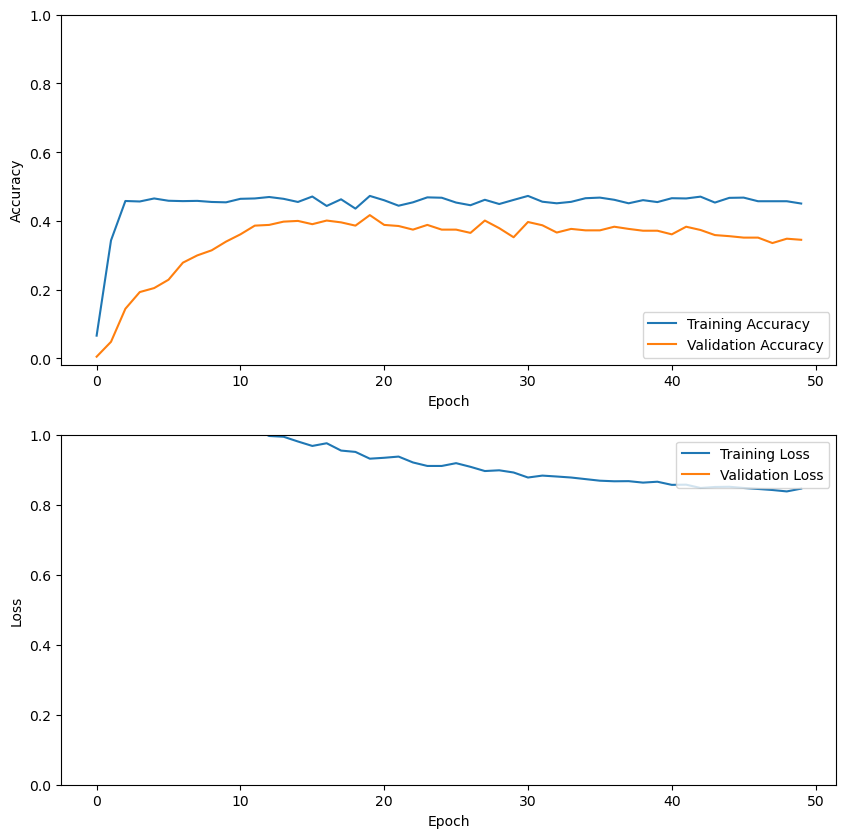

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.0])
plt.title('')
plt.xlabel('Epoch')
plt.show()


30/30 [==============================] - 7s 234ms/step
Accuracy:  0.4810126582278481
Precision:  0.2494352869352869
Recall:  0.5023504273504273
F1 Score:  0.3291056166056166


/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


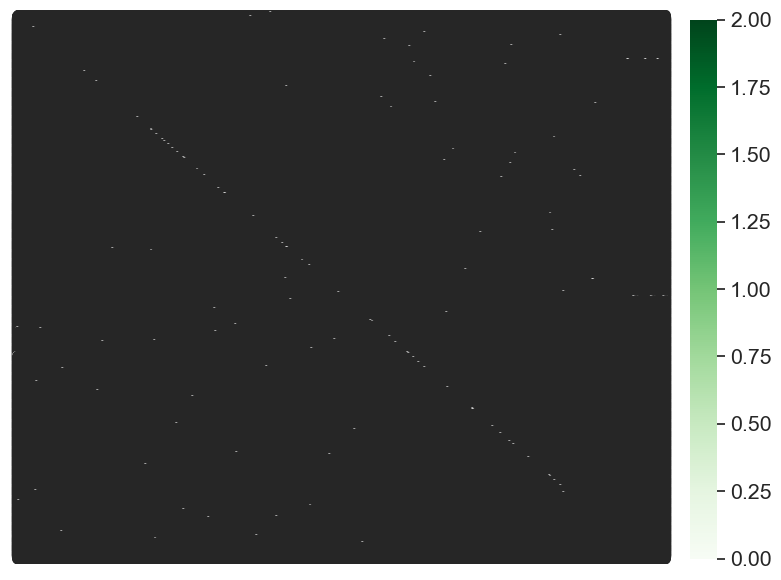

In [23]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

main_folder = 'medplants'
sub_folders = sorted(Path(main_folder ).glob('*'))
labels = [str(x).replace("medplants/","") for x in sub_folders]

print("Accuracy: ", accuracy_score(test_generator.labels, y_pred))
print("Precision: ", precision_score(test_generator.labels, y_pred , average="macro"))
print("Recall: ", recall_score(test_generator.labels, y_pred , average="macro"))
print("F1 Score: ", f1_score(test_generator.labels, y_pred , average="macro"))
matrix = confusion_matrix(test_generator.labels, y_pred)
generate_confusion_matrix(matrix, labels)

In [ ]:
VIT- MODEL

In [28]:
import matplotlib.pyplot as plt
import torch
!pip install torchvision
import torchvision

from torch import nn
from torchvision import transforms

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [34]:
# Setup directory paths to train and test images
train_dir = '/Users/fahimafridi/desktop/code/ThesisFinal'
test_dir = '/Users/fahimafridi/desktop/code/test'

In [35]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [36]:
# Create image size
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)


In [37]:
# Set the batch size
BATCH_SIZE = 32

# Create data loaders
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms,
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x2d2874c90>,
 [" Men's Flannels",
  " TOM T Men's Solid Formal Royal Blue Shirt ",
  ' green striped shirt',
  '(A) COLOUR royal blue new 100_ Cotton Short Sleeve Tshirt For Men',
  '(Men_s) Long sleeve polo-shirt, RED - GREY - DARK GREY - NAVY stripes',
  '(Men_s) Long sleeve polo-shirt, pocket, BEIGE - ORANGE stripes, double collar',
  '(Men_s) Short sleeve polo-shirt, GREY with GREEN fine stripes',
  '123t Genius Periodic Table Design Funny Sweatshirt',
  '1st Rule of Programming Half Sleeve Unisex T-Shirt',
  'AC MILAN Adidas Long Sleeve Fly Emirates Jersey',
  'AE STRIPED POLO SHIRT',
  'ASSASSIN’S CREED LOGO GRAPHIC T SHIRT',
  'Adidas Statement Seamless Polo Shirt',
  'Adidas Striped 15 Long Sleeve Jersey (S17194) Hosszú ujjú mez, póló',
  'Adidas Striped 21 Jersey - Black Glory Pink',
  'Aladdin logo navy blue full sleeve t shirt',
  'Alex Mill Seersucker Camp Shirt - Stripe',
  "Aloha Republic Batik Hibiscus Purple Cotton Men's Hawa

torch.Size([3, 224, 224]) tensor(749)


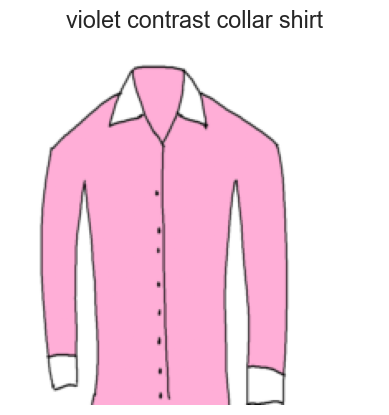

In [38]:
# Let's visualize a image in order to know if data is loaded properly or not

# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
print(image.shape, label)

# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

In [39]:
# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate variables
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)

        # 6. Make sure the output shape has the right order
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

In [40]:
# Let's test it on single image
patch_size =16

# Set seeds
def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)



set_seeds()

# Create an instance of patch embedding layer
patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)

# Pass a single image through
print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [41]:
print(patch_embedded_image)
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         ...,
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [42]:
# Now add the the learnable class embedding and position embeddings
# From start to positional encoding: All in 1 cell

set_seeds()

# 1. Set patch size
patch_size = 16

# 2. Print shape of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")



# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# 8. Create position embedding
number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) # make sure it's learnable


# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")
#patch_and_position_embedding

print(patch_embedding_class_token)  #1 is added in the beginning of each


Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])
tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         ...,
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662],
         [-1.0385,  0.2844, -0.2902,  ...,  0.7915, -0.4702,  0.3662]]],
       grad_fn=<CatBackward0>)


In [43]:
# 1. Create a class that inherits from nn.Module
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ("MSA block" for short).
    """
    # 2. Initialize the class with hyperparameters from Table 1
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multi-Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True) # does our batch dimension come first?

    # 5. Create a forward() method to pass the data throguh the layers
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embeddings
                                             key=x, # key embeddings
                                             value=x, # value embeddings
                                             need_weights=False) # do we need the weights or just the layer outputs?
        return attn_output

In [44]:
# 1. Create a class that inherits from nn.Module
class MLPBlock(nn.Module):
    """Creates a layer normalized multilayer perceptron block ("MLP block" for short)."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden Size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 dropout:float=0.1): # Dropout from Table 3 for ViT-Base
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multilayer perceptron (MLP) layer(s)
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # "The MLP contains two layers with a GELU non-linearity (section 3.1)."
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, # needs to take same in_features as out_features of layer above
                      out_features=embedding_dim), # take back to embedding_dim
            nn.Dropout(p=dropout) # "Dropout, when used, is applied after every dense layer.."
        )

    # 5. Create a forward() method to pass the data throguh the layers
    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

In [45]:
# 1. Create a class that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                 attn_dropout:float=0): # Amount of dropout for attention layers
        super().__init__()

        # 3. Create MSA block (equation 2)
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)

        # 4. Create MLP block (equation 3)
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)

    # 5. Create a forward() method
    def forward(self, x):

        # 6. Create residual connection for MSA block (add the input to the output)
        x =  self.msa_block(x) + x

        # 7. Create residual connection for MLP block (add the input to the output)
        x = self.mlp_block(x) + x

        return x

In [47]:
transformer_encoder_block = TransformerEncoderBlock()
!pip install torchinfo
from torchinfo import summary
# # Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
       row_settings=["var_names"])

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata


Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

In [ ]:
Transformer Bulding

In [46]:
# 1. Create a ViT class that inherits from nn.Module
class ViT(nn.Module):
    """Creates a Vision Transformer architecture with ViT-Base hyperparameters by default."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000): # Default for ImageNet but can customize this
        super().__init__() # don't forget the super().__init__()!

        # 3. Make the image size is divisble by the patch size
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

        # 4. Calculate number of patches (height * width/patch^2)
        self.num_patches = (img_size * img_size) // patch_size**2

        # 5. Create learnable class embedding (needs to go at front of sequence of patch embeddings)
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)

        # 6. Create learnable position embedding
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)

        # 7. Create embedding dropout value
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        # 8. Create patch embedding layer
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)

        # 9. Create Transformer Encoder blocks (we can stack Transformer Encoder blocks using nn.Sequential())
        # Note: The "*" means "all"
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])

        # 10. Create classifier head
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )

    # 11. Create a forward() method
    def forward(self, x):

        # 12. Get batch size
        batch_size = x.shape[0]
        

        # 13. Create class token embedding and expand it to match the batch size (equation 1)
        class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

        # 14. Create patch embedding (equation 1)
        x = self.patch_embedding(x)

        # 15. Concat class embedding and patch embedding (equation 1)
        x = torch.cat((class_token, x), dim=1)

        # 16. Add position embedding to patch embedding (equation 1)
        x = self.position_embedding + x

        # 17. Run embedding dropout (Appendix B.1)
        x = self.embedding_dropout(x)

        # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x


In [62]:
# Train our MOdel

# Create an instance of ViT with the number of classes we're working with (pizza, steak, sushi)
vit = ViT(num_classes=len(class_names))


In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit.parameters(), lr=3e-4)  # Adjust the learning rate as needed

# Move the model to the appropriate device (CPU or GPU)
vit.to(device)

# Set the number of training epochs
num_epochs = 10  # You can adjust this number as needed

# Training loop
for epoch in range(num_epochs):
    # Set the model in training mode
    vit.train()

    # Initialize variables to keep track of loss and accuracy
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Iterate through the training data
    for batch_idx, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = vit(images)

        # Calculate loss
        loss = loss_fn(outputs, labels)

        # Backpropagation
        loss.backward()

        # Update the optimizer
        optimizer.step()

        # Update the statistics
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        # Print batch-level progress
        if batch_idx % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] - Batch [{batch_idx}/{len(train_dataloader)}] - Loss: {loss.item():.4f}")

    # Calculate and print average training loss and accuracy for this epoch
    average_loss = total_loss / len(train_dataloader)
    accuracy = correct_predictions / total_samples
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Loss: {average_loss:.4f} - Accuracy: {accuracy:.4f}")

# Rest of the code (model evaluation) remains the same


Epoch [1/10] - Batch [0/100] - Loss: 6.9077
Epoch [1/10] - Batch [10/100] - Loss: 7.2447
Epoch [1/10] - Batch [20/100] - Loss: 7.0408
Epoch [1/10] - Batch [30/100] - Loss: 7.1086
Epoch [1/10] - Batch [40/100] - Loss: 7.1976
Epoch [1/10] - Batch [50/100] - Loss: 7.0129
Epoch [1/10] - Batch [60/100] - Loss: 7.3010
Epoch [1/10] - Batch [70/100] - Loss: 7.0399
Epoch [1/10] - Batch [80/100] - Loss: 7.1172
Epoch [1/10] - Batch [90/100] - Loss: 7.0108
Epoch [1/10] - Loss: 7.1063 - Accuracy: 0.0009
Epoch [2/10] - Batch [0/100] - Loss: 6.7694
Epoch [2/10] - Batch [10/100] - Loss: 6.8078
Epoch [2/10] - Batch [20/100] - Loss: 6.9299
Epoch [2/10] - Batch [30/100] - Loss: 7.1198
Epoch [2/10] - Batch [40/100] - Loss: 6.9485
Epoch [2/10] - Batch [50/100] - Loss: 6.9809
Epoch [2/10] - Batch [60/100] - Loss: 7.0157
Epoch [2/10] - Batch [70/100] - Loss: 7.0756
Epoch [2/10] - Batch [80/100] - Loss: 6.9963
Epoch [2/10] - Batch [90/100] - Loss: 6.9631
Epoch [2/10] - Loss: 6.9519 - Accuracy: 0.0019
Epoch [3

In [60]:
# Assuming you have already created your ViT model instance 'vit'

# Define the loss function (e.g., CrossEntropyLoss) and optimizer (e.g., Adam)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vit.parameters(), lr=3e-4)  # Adjust the learning rate as needed

# Move the model to the appropriate device (CPU or GPU)
vit.to(device)

# Set the number of training epochs
num_epochs = 10  # You can adjust this number as needed

# Training loop
for epoch in range(num_epochs):
    # Set the model in training mode
    vit.train()

    # Initialize variables to keep track of loss and accuracy
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Iterate through the training data
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = vit(images)

        # Calculate loss
        loss = loss_fn(outputs, labels)

        # Backpropagation
        loss.backward()

        # Update the optimizer
        optimizer.step()

        # Update the statistics
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate and print average training loss and accuracy for this epoch
    average_loss = total_loss / len(train_dataloader)
    accuracy = correct_predictions / total_samples
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Loss: {average_loss:.4f} - Accuracy: {accuracy:.4f}")

# After training, you can evaluate the model on the test dataset
vit.eval()  # Set the model in evaluation mode
total_loss = 0.0
correct_predictions = 0
total_samples = 0

# Iterate through the test data
for images, labels in test_dataloader:
    images, labels = images.to(device), labels.to(device)

    # Forward pass
    outputs = vit(images)

    # Calculate loss
    loss = loss_fn(outputs, labels)

    # Update the statistics
    total_loss += loss.item()
    _, predicted = torch.max(outputs, 1)
    correct_predictions += (predicted == labels).sum().item()
    total_samples += labels.size(0)

# Calculate and print the test loss and accuracy
average_loss = total_loss / len(test_dataloader)
accuracy = correct_predictions / total_samples
print(f"Test Loss: {average_loss:.4f} - Test Accuracy: {accuracy:.4f}")


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2d0444040>
Traceback (most recent call last):
  File "/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/fahimafridi/anaconda3/lib/python3.11/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fahimafridi/anaconda3/lib/python3.11/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fahimafridi/anaconda3/lib/python3.11/multiprocessing/connection.py", line 930, in wait
    ready = selector.select(timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

KeyboardInterrupt: 

In [57]:
!pip install git+https://github.com/mrdbourke/pytorch-deep-learning
!pip install going_modular

  Cloning https://github.com/mrdbourke/pytorch-deep-learning to /private/var/folders/7r/fxmc6_cd23j33vl8hr4z1ktw0000gn/T/pip-req-build-inyter1s
  Running command git clone --filter=blob:none --quiet https://github.com/mrdbourke/pytorch-deep-learning /private/var/folders/7r/fxmc6_cd23j33vl8hr4z1ktw0000gn/T/pip-req-build-inyter1s
  Resolved https://github.com/mrdbourke/pytorch-deep-learning to commit a2a7c746422dfebf745af6c3c594325c67804e87
ERROR: git+https://github.com/mrdbourke/pytorch-deep-learning does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
ERROR: Could not find a version that satisfies the requirement going_modular (from versions: none)
ERROR: No matching distribution found for going_modular


In [59]:

from pytorch_deep_learning.going_modular.going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=30,
                       device=device)

  0%|          | 0/30 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x2d0444040>
Traceback (most recent call last):
  File "/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1442, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/Users/fahimafridi/anaconda3/lib/python3.11/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fahimafridi/anaconda3/lib/python3.11/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fahimafridi/anaconda3/lib/python3.11/multiprocessing/connection.py", line 930, in wait
    ready = selector.select(timeout)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Use

KeyboardInterrupt: 

In [ ]:
CNN Reddo

In [69]:
main_folder = '/Users/fahimafridi/desktop/code/ThesisFinal'
sub_folders = Path(main_folder ).glob('*')

rows1 = []
for folder in sub_folders:
	class_name = str(folder).replace("ThesisFinal/","")
	for file in os.listdir(folder):
		data = [str(folder)+"/"+file, class_name]
		rows1.append(data)

#store the all data inside a pandas dataframe
df1 = pd.DataFrame(rows1, columns=["Full Path", "Class Name"])

#split the frame with stratify=target_column to maintain equal split portions across all classes
x_train, y_train= df1["Full Path"], df1["Class Name"]

main_folder1 = '/Users/fahimafridi/desktop/code/test'
sub_folders1 = Path(main_folder1 ).glob('*')

rows2 = []
for folder in sub_folders1:
	class_name = str(folder).replace("test/","")
	for file in os.listdir(folder):
		data = [str(folder)+"/"+file, class_name]
		rows2.append(data)

#store the all data inside a pandas dataframe
df2 = pd.DataFrame(rows2, columns=["Full Path", "Class Name"])

#split the frame with stratify=target_column to maintain equal split portions across all classes
x_test, y_test= df2["Full Path"], df2["Class Name"]

#store the splitted portions into dataframe
df1train = pd.DataFrame({'Full Path':x_train, 'Class Name':y_train})
df2test = pd.DataFrame({'Full Path':x_test, 'Class Name':y_test})

print(dftrain)
print(dftest)

                                              Full Path  \
2368  /Users/fahimafridi/desktop/code/ThesisFinal/wh...   
2173  /Users/fahimafridi/desktop/code/ThesisFinal/Fr...   
4711  /Users/fahimafridi/desktop/code/ThesisFinal/gr...   
1083  /Users/fahimafridi/desktop/code/ThesisFinal/no...   
1403  /Users/fahimafridi/desktop/code/ThesisFinal/na...   
...                                                 ...   
2141  /Users/fahimafridi/desktop/code/ThesisFinal/bl...   
2171  /Users/fahimafridi/desktop/code/ThesisFinal/Me...   
3678  /Users/fahimafridi/desktop/code/ThesisFinal/Re...   
3187  /Users/fahimafridi/desktop/code/ThesisFinal/FU...   
0     /Users/fahimafridi/desktop/code/ThesisFinal/gr...   

                                             Class Name  
2368  /Users/fahimafridi/desktop/code/when life give...  
2173  /Users/fahimafridi/desktop/code/Friends Logo W...  
4711  /Users/fahimafridi/desktop/code/green vertical...  
1083  /Users/fahimafridi/desktop/code/no smoking lab...  
1

In [70]:
#params
#results - result from model prediction
#labels - the classes list
def generate_confusion_matrix(results, labels):
  cmn = results
  plt.figure(figsize=(10,7))
  sn.set(font_scale=1.4) # for label size
  sn.heatmap(cmn, annot=True, fmt='.2f', annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels, cmap="Greens") # font size
  plt.show()

#params
#img_folder - path to folder
def show_images(img_folder):
  fig=plt.figure(figsize=(20,20))
  classes = sorted(Path(img_folder).glob('*'))
  i=0
  for cl in classes:
      file = random.choice(os.listdir(cl))
      image_path= os.path.join(cl, file)
      img=mpimg.imread(image_path)
      i=i+1
      fig.add_subplot(5,2,i)
      plt.imshow(img)

#params
#model - the trained model or the model loaded from file
#classes - the classes list
#img_folder - path to image
#size - size of the image for resizing to match CNN input
def predict_image(model, classes, img_path, size):
  # load the image
  image_orig = cv2.imread(img_path)
  image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
  print(img_path)

  # pre-process the image for classification
  image = cv2.resize(image_orig, (size, size))
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)

  result = model.predict(image)
  class_id = result[0].argmax()
  classification = "Class: {} ({:.2f}%)".format(classes[class_id], result[0][class_id] * 100)

  plt.figure(figsize=(8, 8))
  plt.imshow(image_orig)
  plt.show()
  print("[PREDICTION] {}".format(classification))

In [71]:
show_images("ThesisFinal")
show_images("test")

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [77]:
IMG_SIZE = 224
CHANNELS = 3

CLASSES = 782
EPOCH = 50
BATCH_SIZE = 32
LR = 0.0001
SEED = 42

In [78]:
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
#define the base model which is MobileNetV3
mobilenetv3 = MobileNetV3Large(include_top=False,
                               input_shape = (IMG_SIZE,IMG_SIZE, CHANNELS))

#add additional layers and classification layer to the base model
x = GlobalAveragePooling2D()(mobilenetv3.output)
x=Dense(512,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
classifier=Dense(CLASSES,activation='softmax')(x)

#define the final model
model=Model(name="Doodle", inputs=mobilenetv3.input, outputs=classifier)

#compile the model
#opt = Adam(learning_rate=LR)
#model.compile(loss="categorical_crossentropy",
              #optimizer = opt,
              #metrics=['accuracy'])
opt = LegacyAdam(learning_rate=LR)
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "Doodle"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_5[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling_4[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                   

In [82]:
train_datagen=ImageDataGenerator(validation_split=0.25)

#Define the image data generator for the training
train_generator=train_datagen.flow_from_dataframe(
dataframe=df1train,
x_col="Full Path",
y_col="Class Name",
subset="training",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=True,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

#Define the image data generator for the validation
validation_generator=train_datagen.flow_from_dataframe(
dataframe=df1train,
x_col="Full Path",
y_col="Class Name",
subset="validation",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=True,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

#Define the image data generator for the evaluation/testing
test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow_from_dataframe(
dataframe=df2test,
x_col="Full Path",
y_col="Class Name",
batch_size=BATCH_SIZE,
seed=SEED,
shuffle=False,
class_mode="categorical",
target_size=(IMG_SIZE,IMG_SIZE))

Found 2391 validated image filenames belonging to 782 classes.
Found 796 validated image filenames belonging to 782 classes.
Found 2403 validated image filenames belonging to 782 classes.


/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Full Path". These filename(s) will be ignored.
  warnings.warn(
/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Full Path". These filename(s) will be ignored.
  warnings.warn(
/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="Full Path". These filename(s) will be ignored.
  warnings.warn(


In [84]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

plt.rcParams['font.size'] = 12
sns.set_style("dark")
warnings.filterwarnings('ignore')

In [ ]:
NLP

In [91]:
!pip install sentencepiece



In [92]:
!pip install torch


In [93]:
import torch
print(torch.__version__)


2.0.1


In [94]:
pip install --upgrade transformers


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install accelerate==0.20.3

!pip install --upgrade transformers

  Obtaining dependency information for accelerate==0.20.3 from https://files.pythonhosted.org/packages/10/d3/5382aa337d3e67214003a17b06bfc07cf0334356b4e8aaf3b12b0d38c83f/accelerate-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 1.4 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.20.1
    Uninstalling accelerate-0.20.1:
      Successfully uninstalled accelerate-0.20.1


In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

# Load your dataset from a CSV file
data = pd.read_csv("/Users/fahimafridi/desktop/NLP/Final.csv")

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the T5 tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Tokenize the "String" column in the dataset
train_data["String"] = train_data["String"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=32))
test_data["String"] = test_data["String"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=32))

# Tokenize the "Queries" column for labels
train_labels = tokenizer(list(train_data["Queries"]), padding="max_length", truncation=True, max_length=32)
test_labels = tokenizer(list(test_data["Queries"]), padding="max_length", truncation=True, max_length=32)

# Define a custom PyTorch dataset without dictionaries
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.encodings[idx].input_ids)
        attention_mask = torch.tensor(self.encodings[idx].attention_mask)
        return input_ids, attention_mask

    def __len__(self):
        return len(self.labels)

# Create datasets without dictionaries
train_dataset = CustomDataset(train_data["String"], train_labels["input_ids"])
test_dataset = CustomDataset(test_data["String"], test_labels["input_ids"])

# Define a custom data collator
def my_data_collator(batch):
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]
    
    return {
        "input_ids": torch.stack(input_ids, dim=0),
        "attention_mask": torch.stack(attention_masks, dim=0),
    }

# Define a function to fine-tune the model
def fine_tune_model(train_dataset, model):
    # Define training arguments
    training_args = TrainingArguments(
        output_dir="/Users/fahimafridi/desktop/NLP/OUTPUT",
        overwrite_output_dir=True,
        num_train_epochs=3,
        per_device_train_batch_size=8,
        save_steps=100,
        evaluation_strategy="steps",
        eval_steps=100,
        save_total_limit=2,
        remove_unused_columns=False,
    )

    # Define trainer with custom data collator
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        data_collator=my_data_collator,  # Use custom data collator
    )

    # Fine-tune the model
    trainer.train()
    trainer.save_model()

# Fine-tune the model
fine_tune_model(train_dataset, model)

# Define a function for testing and validation
def test_and_validate(test_dataset, model):
    # Define a DataLoader for testing
    test_dataloader = DataLoader(test_dataset, batch_size=8)

    # Generate predictions
    predictions = []
    for input_ids, attention_mask in test_dataloader:
        generated_ids = model.generate(input_ids, attention_mask=attention_mask, max_length=32, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, early_stopping=True)
        generated_queries = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
        predictions.extend(generated_queries)

    # Calculate metrics or perform validation as needed
    test_data["predicted_google_query"] = predictions
    accuracy = (test_data["predicted_google_query"] == test_data["Queries"]).mean()
    print(f"Accuracy: {accuracy:.4f}")

# Test and validate the model
test_and_validate(test_dataset, model)


In [18]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import T5ForConditionalGeneration, T5Tokenizer, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

# Load your dataset from a CSV file
data = pd.read_csv("/Users/fahimafridi/desktop/NLP/Final.csv")

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
print("Train dataset size:", len(train_data))
print("Test dataset size:", len(test_data))

# Access data by index
index = 529  # Replace with the index causing the error
if index < len(train_data):
    print("Train data at index:", train_data.iloc[index])
else:
    print("Index out of range for the train dataset")

if index < len(test_data):
    print("Test data at index:", test_data.iloc[index])
else:
    print("Index out of range for the test dataset")

Train dataset size: 1208
Test dataset size: 303
Train data at index: String                     Checked Shirt in Blue & Red
Queries    ralph-lauren-boys-checked-shirt-in-blue-red
Name: 708, dtype: object
Index out of range for the test dataset


In [20]:
# Initialize the T5 tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Tokenize the "String" column in the dataset
train_data["String"] = train_data["String"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=32))
test_data["String"] = test_data["String"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=32))

In [21]:
# Tokenize the "Queries" column for labels
train_labels = tokenizer(list(train_data["Queries"]), padding="max_length", truncation=True, max_length=32)
test_labels = tokenizer(list(test_data["Queries"]), padding="max_length", truncation=True, max_length=32)

In [22]:
# Define a custom PyTorch dataset without dictionaries
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        input_ids = torch.tensor(self.encodings[idx].input_ids)
        attention_mask = torch.tensor(self.encodings[idx].attention_mask)
        return input_ids, attention_mask

    def __len__(self):
        return len(self.labels)

# Create datasets without dictionaries
train_dataset = CustomDataset(train_data["String"], train_labels["input_ids"])
test_dataset = CustomDataset(test_data["String"], test_labels["input_ids"])

In [23]:
def my_data_collator(batch):
    input_ids = [item[0] for item in batch]
    attention_masks = [item[1] for item in batch]
    
    return {
        "input_ids": torch.stack(input_ids, dim=0),
        "attention_mask": torch.stack(attention_masks, dim=0),
    }

# Define a function to fine-tune the model
def fine_tune_model(train_dataset, model):
    # Define training arguments
    training_args = TrainingArguments(
        output_dir="/Users/fahimafridi/desktop/NLP/OUTPUT",
        overwrite_output_dir=True,
        num_train_epochs=3,
        per_device_train_batch_size=8,
        save_steps=100,
        evaluation_strategy="steps",
        eval_steps=100,
        save_total_limit=2,
        remove_unused_columns=False,
    )

    # Define trainer with custom data collator
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        data_collator=my_data_collator,  # Use custom data collator
    )

    # Fine-tune the model
    trainer.train()
    trainer.save_model()


In [24]:
fine_tune_model(train_dataset, model)

KeyError: 529

In [32]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import T5ForConditionalGeneration, T5Tokenizer
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW
from tqdm import tqdm

# Load your dataset from a CSV file
data = pd.read_csv("/Users/fahimafridi/desktop/NLP/Final.csv")

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the T5 tokenizer and model
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Tokenize the "String" column in the dataset
train_data["String"] = train_data["String"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=32))
test_data["String"] = test_data["String"].apply(lambda x: tokenizer(x, padding="max_length", truncation=True, max_length=32))

# Tokenize the "Queries" column for labels
train_labels = tokenizer(list(train_data["Queries"]), padding="max_length", truncation=True, max_length=32)
test_labels = tokenizer(list(test_data["Queries"]), padding="max_length", truncation=True, max_length=32)

# Define a custom PyTorch dataset
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        try:
            input_ids = torch.tensor(self.encodings[idx]["input_ids"])
            attention_mask = torch.tensor(self.encodings[idx]["attention_mask"])
            label_ids = torch.tensor(self.labels["input_ids"][idx])
            return input_ids, attention_mask, label_ids
        except IndexError:
            # Handle out-of-range indices by skipping the example
            return None

    def __len__(self):
        return len(self.labels["input_ids"])
    
# Define training arguments
training_args = TrainingArguments(
    output_dir="/Users/fahimafridi/desktop/NLP/OUTPUT",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    save_steps=100,
    evaluation_strategy="steps",
    eval_steps=100,
    save_total_limit=2,
    remove_unused_columns=False,
)

# Define optimizer and dataloader
optimizer = AdamW(model.parameters(), lr=1e-4)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Fine-tune the model
model.train()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(training_args.num_train_epochs):
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}"):
        input_ids, attention_mask, label_ids = batch
        input_ids, attention_mask, label_ids = input_ids.to(device), attention_mask.to(device), label_ids.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=label_ids)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Save the fine-tuned model
model.save_pretrained("/Users/fahimafridi/desktop/NLP/fine_tuned_model")

# Define a function for testing and validation
def test_and_validate(test_dataset, model):
    # Define a DataLoader for testing
    test_dataloader = DataLoader(test_dataset, batch_size=8)
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    predictions = []
    with torch.no_grad():
        for batch in tqdm(test_dataloader, desc="Testing"):
            input_ids, attention_mask, label_ids = batch
            input_ids, attention_mask, label_ids = input_ids.to(device), attention_mask.to(device), label_ids.to(device)
            generated_ids = model.generate(input_ids, max_length=32, num_beams=5, no_repeat_ngram_size=2, top_k=50, top_p=0.95, early_stopping=True)
            generated_queries = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
            predictions.extend(generated_queries)

    # Calculate metrics or perform validation as needed
    test_data["predicted_google_query"] = predictions
    accuracy = (test_data["predicted_google_query"] == test_data["Queries"]).mean()
    print(f"Accuracy: {accuracy:.4f}")

# Test and validate the model
test_and_validate(test_dataset, model)


/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1:   0%|          | 0/151 [00:00<?, ?it/s]


KeyError: 714

In [ ]:
NEW NLP

In [38]:
!pip install --upgrade pip
!pip install --upgrade --upgrade-strategy eager black typing-extensions pyqt5 pyqtwebengine


  Obtaining dependency information for black from https://files.pythonhosted.org/packages/72/1a/fc7a669677250d73ea190342d360b3bd150043e61e85d1dbb7ae8bd8525a/black-23.9.1-cp311-cp311-macosx_10_16_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 671.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 3.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... \^C


In [43]:
virtualenv venv
source venv/bin/activate

SyntaxError: invalid syntax (3640729104.py, line 1)

In [45]:
# install from repository otherwise we would get an error.
!pip install -Uq git+https://github.com/huggingface/transformers.git
!pip install -Uq git+https://github.com/huggingface/accelerate.git
!pip install -q torch_snippets



In [44]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch_snippets import *
from transformers import (T5Tokenizer,
                          T5ForConditionalGeneration,
                          )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (/Users/fahimafridi/anaconda3/lib/python3.11/site-packages/typing_extensions.py)